In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Train Non-IID com Test IID

<Axes: xlabel='round', ylabel='fed_acc'>

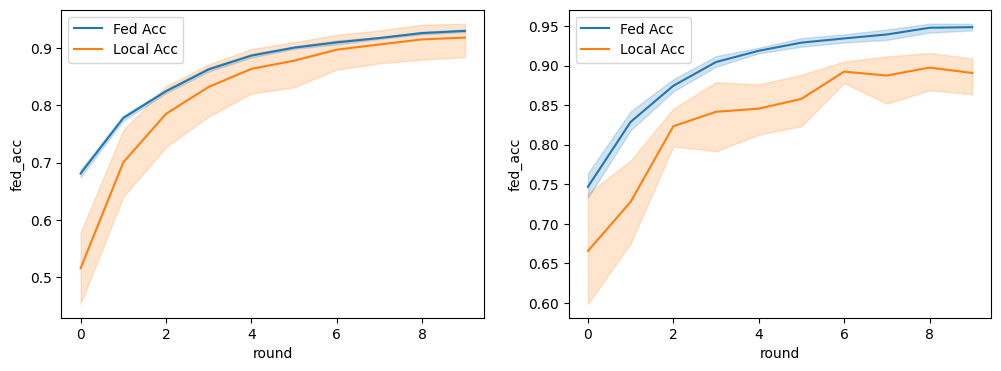

In [3]:
df_train = pd.read_csv('logs-cases/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cases/eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Non-IID


<Axes: xlabel='round', ylabel='fed_acc'>

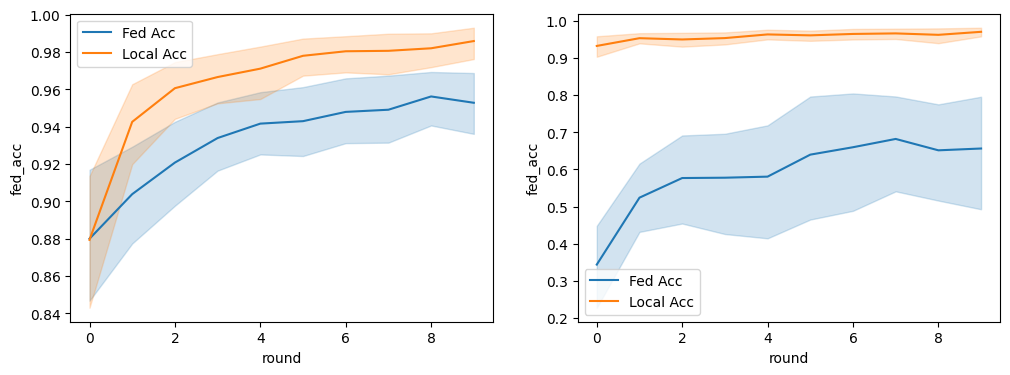

In [5]:
df_train = pd.read_csv('logs-cases/train_niid.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cases/eval_niid.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# IID

<Axes: xlabel='round', ylabel='fed_acc'>

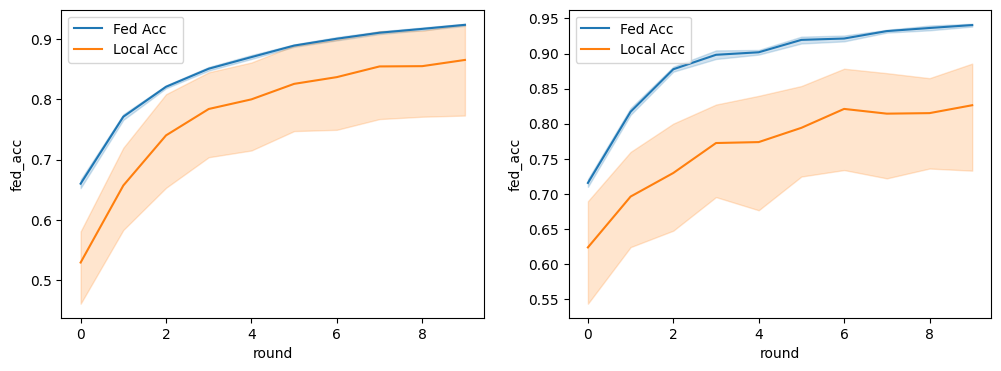

In [6]:
df_train = pd.read_csv('logs-cases/train-iid.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cases/eval-iid.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# CIA - IID

<Axes: xlabel='round', ylabel='fed_acc'>

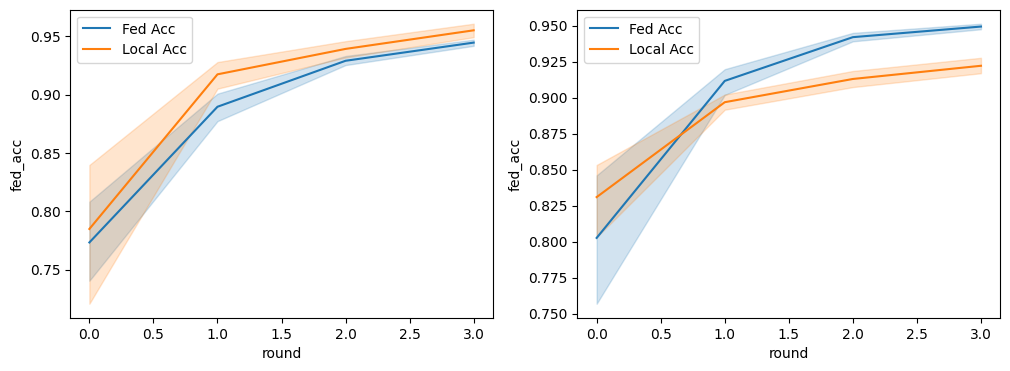

In [14]:
df_train = pd.read_csv('logs-cia/iid-train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/iid-eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# CIA - NO-IID

<Axes: xlabel='round', ylabel='fed_acc'>

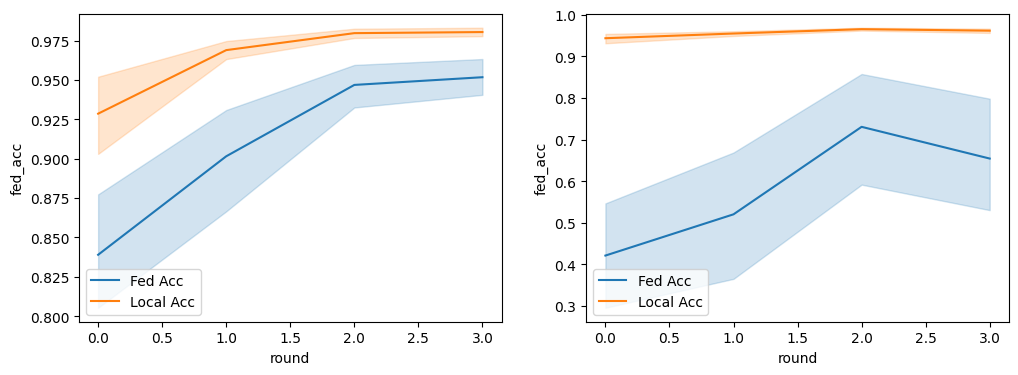

In [13]:
df_train = pd.read_csv('logs-cia/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Train Non-IID with Test IID

<Axes: xlabel='round', ylabel='fed_acc'>

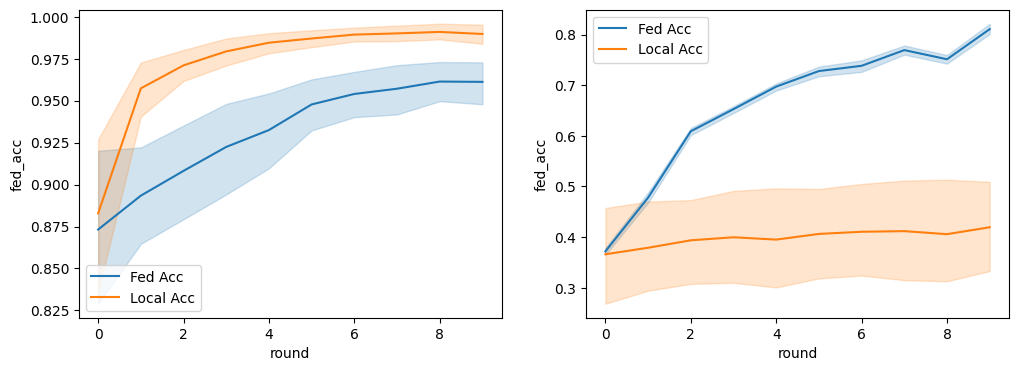

In [17]:
df_train = pd.read_csv('logs-cia/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

## Com somente 2 clientes da federação

In [31]:
df_train = pd.read_csv('logs/eval.csv', names=['cid', 'fed_acc','cia_acc', 'local_acc', "participate", 'round'])
# Suponha que df seja o DataFrame contendo os seus dados

# Calcular a média de fed_acc por cid e round
# fed_acc_means = df_train.groupby(['cid', 'round']).agg(mean_fed_acc=('fed_acc', 'mean')).reset_index()

# Mesclar os dados brutos de local_acc com as médias calculadas
# merged_data = pd.merge(fed_acc_means, df_train[['cid', 'round', 'local_acc']], on=['cid', 'round'])
# Ordenar por round para garantir a continuidade das linhas nos gráficos
# merged_data.sort_values(by=['cid', 'round'], inplace=True)
# merged_data
# Criar um gráfico para cada cid
sns.set_theme(style='whitegrid')
g = sns.FacetGrid(df_train, col="cid", col_wrap=4, height=3, aspect=1.5)
g.map_dataframe(sns.lineplot, x='round', y='fed_acc', label='Fed Acc', marker='o')
g.map_dataframe(sns.lineplot, x='round', y='local_acc', label='Local Acc', color='r', marker='o')

# # Adicionar legendas e labels
g.add_legend()
g.set_axis_labels("Round", "Accuracy")
g.set_titles("CID: {col_name}")

# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'logs/eval.csv'

## IID Com 3 modelos

<Axes: title={'center': 'Evaluate'}, xlabel='round', ylabel='fed_acc'>

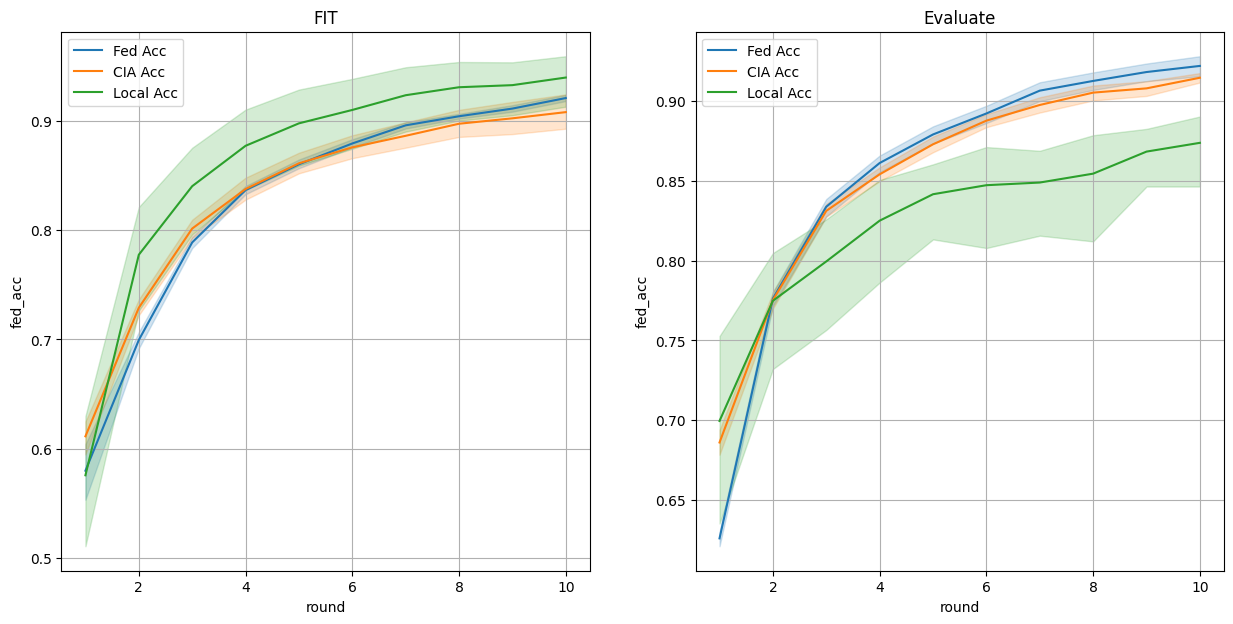

In [22]:
df_train = pd.read_csv('all-cases/iid-train.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])
df_test  = pd.read_csv('all-cases/iid-eval.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_train, ax=ax[0], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_test, ax=ax[1], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

## No-idd com 3 modelos

<Axes: title={'center': 'Evaluate'}, xlabel='round', ylabel='fed_acc'>

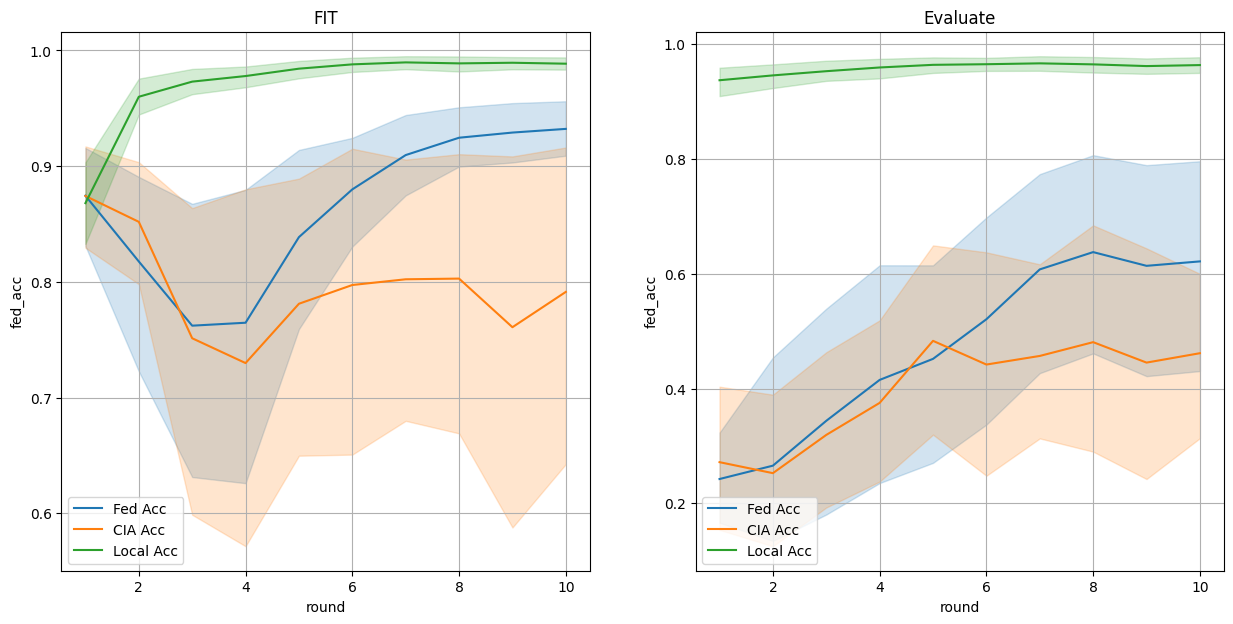

In [30]:
df_train = pd.read_csv('all-cases/no-idd-train.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])
df_test  = pd.read_csv('all-cases/no-idd-eval.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_train, ax=ax[0], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_test, ax=ax[1], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Train Non-IID com Test IID

<Axes: title={'center': 'Evaluate'}, xlabel='round', ylabel='fed_acc'>

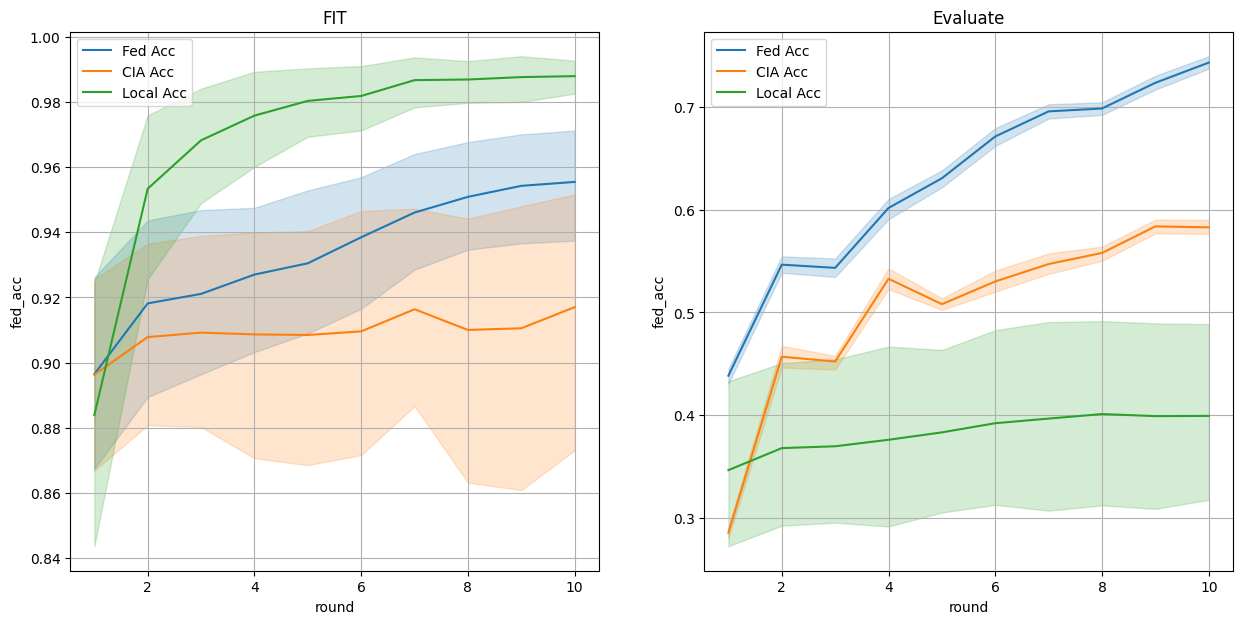

In [27]:
df_train = pd.read_csv('all-cases/train.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])
df_test  = pd.read_csv('all-cases/eval.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_train, ax=ax[0], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_test, ax=ax[1], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')